<a href="https://colab.research.google.com/github/ashishkej/eva8_session7/blob/main/EVA8_Session7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=eb392d58795a1c52116d98ae7b0c1d34b6eb9fa36e6aacc69386efad7e7fe2fb
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam


In [2]:
!git clone https://github.com/ashishkej/eva8-pytorch-models

Cloning into 'eva8-pytorch-models'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 42 (delta 15), reused 33 (delta 9), pack-reused 0
Unpacking objects: 100% (42/42), 13.25 KiB | 904.00 KiB/s, done.


In [3]:
import sys 
sys.path.append('/content/eva8-pytorch-models')

In [4]:
import main
import utils

In [6]:
import torchvision
from torchvision import datasets
# loading the dataset
exp = datasets.CIFAR10('./data', train=True, download=True)
exp_data = exp.data

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [84]:
mean, std = utils.get_mean_and_std(exp_data)
print("Mean of the CIFAR10 dataset ", mean)
print("Standard Deviation of the CIFAR10 dataset ", std)

 - Dataset Numpy Shape: (50000, 32, 32, 3)
 - Min: [0. 0. 0.]
 - Max: [1. 1. 1.]
 - Mean: [0.49139968 0.48215841 0.44653091]
 - Std: [0.24703223 0.24348513 0.26158784]
 - Var: [15.56135559 15.11767693 17.44919073]
Mean of the CIFAR10 dataset  [0.49139968 0.48215841 0.44653091]
Standard Deviation of the CIFAR10 dataset  [0.24703223 0.24348513 0.26158784]


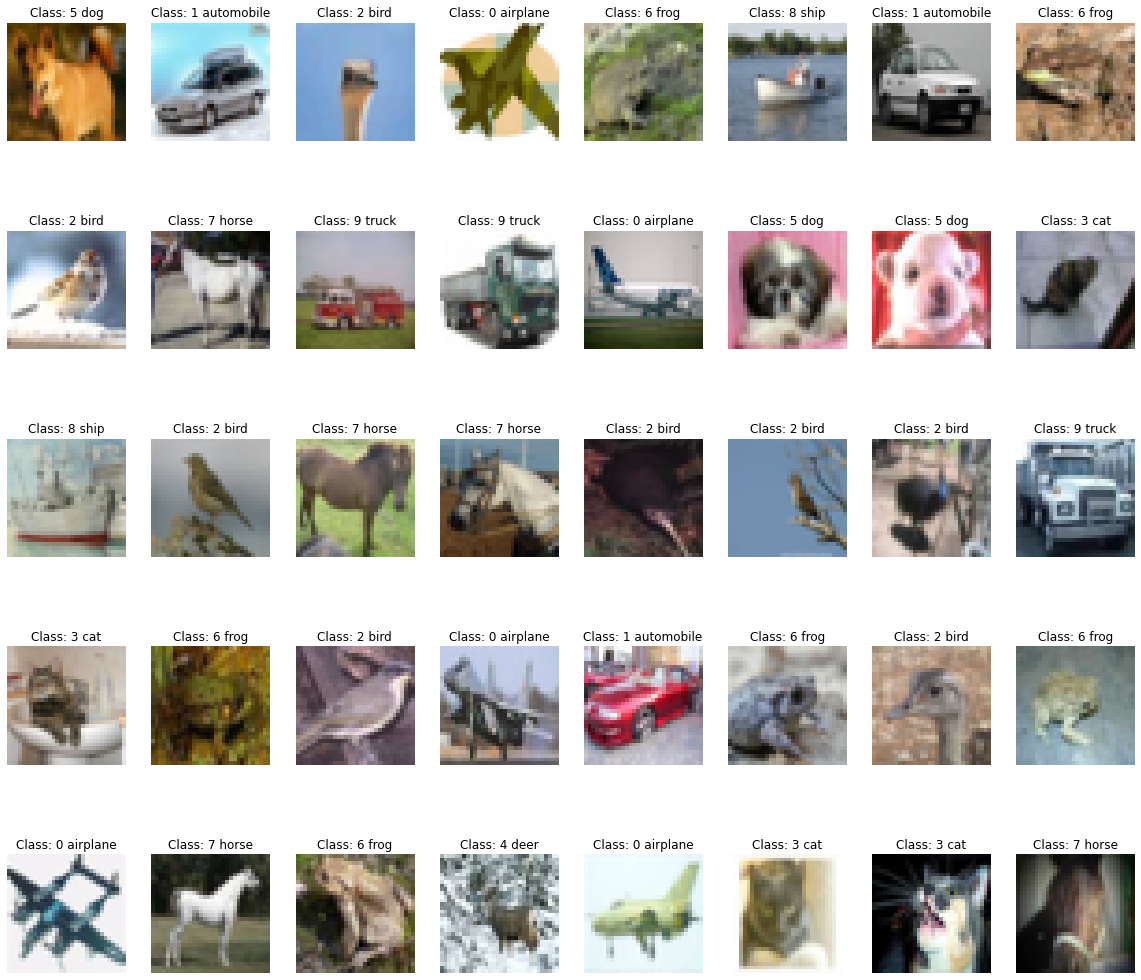

In [91]:
utils.plot_data(exp,5,8)

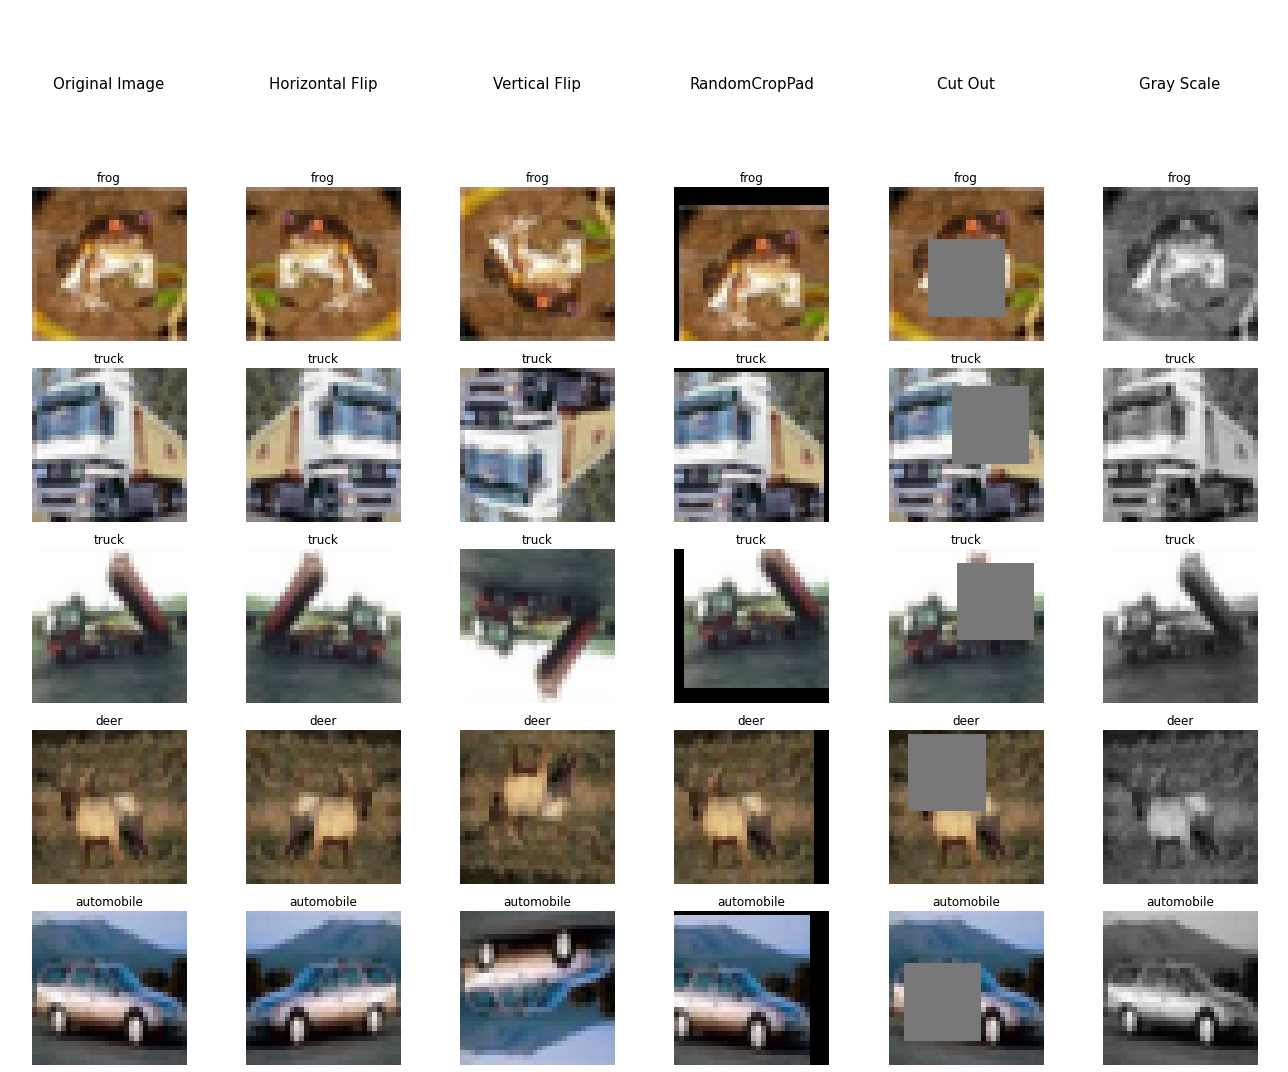

In [82]:
import albumentations as A
aug_dict = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'RandomCropPad': A.Sequential([A.CropAndPad(px=4, keep_size=False), 
                A.RandomCrop(32,32)]),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=16, 
                               min_width=16, fill_value=0.473363*255.0, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}
utils.show_aug_images(exp, aug_dict)

In [5]:
import torch
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available:", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)
    BATCH_SIZE=64
else:
    BATCH_SIZE=64

CUDA Available: True


In [7]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True )
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(utils.AlbumentationImageDataset(trainset, train=True), batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(utils.AlbumentationImageDataset(testset, train=False), batch_size=BATCH_SIZE,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [9]:
from torchsummary import summary
from models import resnet
net_18 = resnet.ResNet18().to(device)
summary(net_18, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [10]:
net_18, history = main.fit_model(net_18, device, train_loader, test_loader,NUM_EPOCHS=20)

EPOCH: 1


Batch_id=781 Loss=1.67274 Accuracy=38.24: 100%|██████████| 782/782 [00:52<00:00, 14.93it/s]



Test set: Average loss: 1.4968, Accuracy: 4694/10000 (46.94%)

EPOCH: 2


Batch_id=781 Loss=1.38571 Accuracy=49.99: 100%|██████████| 782/782 [00:54<00:00, 14.45it/s]



Test set: Average loss: 1.0578, Accuracy: 6240/10000 (62.40%)

EPOCH: 3


Batch_id=781 Loss=1.24107 Accuracy=55.47: 100%|██████████| 782/782 [00:53<00:00, 14.53it/s]



Test set: Average loss: 1.0583, Accuracy: 6248/10000 (62.48%)

EPOCH: 4


Batch_id=781 Loss=1.13001 Accuracy=59.96: 100%|██████████| 782/782 [00:53<00:00, 14.59it/s]



Test set: Average loss: 0.8449, Accuracy: 7010/10000 (70.10%)

EPOCH: 5


Batch_id=781 Loss=1.04105 Accuracy=63.09: 100%|██████████| 782/782 [00:53<00:00, 14.54it/s]



Test set: Average loss: 0.8284, Accuracy: 7091/10000 (70.91%)

EPOCH: 6


Batch_id=781 Loss=0.98021 Accuracy=65.37: 100%|██████████| 782/782 [00:53<00:00, 14.56it/s]



Test set: Average loss: 0.7421, Accuracy: 7437/10000 (74.37%)

EPOCH: 7


Batch_id=781 Loss=0.92847 Accuracy=67.20: 100%|██████████| 782/782 [00:53<00:00, 14.59it/s]



Test set: Average loss: 0.6818, Accuracy: 7655/10000 (76.55%)

EPOCH: 8


Batch_id=781 Loss=0.88799 Accuracy=68.86: 100%|██████████| 782/782 [00:53<00:00, 14.56it/s]



Test set: Average loss: 0.6724, Accuracy: 7718/10000 (77.18%)

EPOCH: 9


Batch_id=781 Loss=0.84774 Accuracy=70.17: 100%|██████████| 782/782 [00:53<00:00, 14.54it/s]



Test set: Average loss: 0.6493, Accuracy: 7788/10000 (77.88%)

EPOCH: 10


Batch_id=781 Loss=0.80660 Accuracy=71.83: 100%|██████████| 782/782 [00:53<00:00, 14.58it/s]



Test set: Average loss: 0.6455, Accuracy: 7801/10000 (78.01%)

EPOCH: 11


Batch_id=781 Loss=0.77791 Accuracy=72.80: 100%|██████████| 782/782 [00:55<00:00, 14.10it/s]



Test set: Average loss: 0.5460, Accuracy: 8177/10000 (81.77%)

EPOCH: 12


Batch_id=781 Loss=0.74952 Accuracy=73.77: 100%|██████████| 782/782 [00:54<00:00, 14.22it/s]



Test set: Average loss: 0.5256, Accuracy: 8208/10000 (82.08%)

EPOCH: 13


Batch_id=781 Loss=0.72780 Accuracy=74.50: 100%|██████████| 782/782 [00:53<00:00, 14.52it/s]



Test set: Average loss: 0.4983, Accuracy: 8309/10000 (83.09%)

EPOCH: 14


Batch_id=781 Loss=0.70431 Accuracy=75.46: 100%|██████████| 782/782 [00:53<00:00, 14.49it/s]



Test set: Average loss: 0.5188, Accuracy: 8204/10000 (82.04%)

EPOCH: 15


Batch_id=781 Loss=0.68008 Accuracy=76.09: 100%|██████████| 782/782 [00:54<00:00, 14.47it/s]



Test set: Average loss: 0.4674, Accuracy: 8429/10000 (84.29%)

EPOCH: 16


Batch_id=781 Loss=0.66398 Accuracy=76.85: 100%|██████████| 782/782 [00:55<00:00, 14.10it/s]



Test set: Average loss: 0.4561, Accuracy: 8445/10000 (84.45%)

EPOCH: 17


Batch_id=781 Loss=0.64414 Accuracy=77.56: 100%|██████████| 782/782 [00:54<00:00, 14.47it/s]



Test set: Average loss: 0.4841, Accuracy: 8392/10000 (83.92%)

EPOCH: 18


Batch_id=781 Loss=0.63193 Accuracy=78.07: 100%|██████████| 782/782 [00:54<00:00, 14.47it/s]



Test set: Average loss: 0.4552, Accuracy: 8462/10000 (84.62%)

EPOCH: 19


Batch_id=781 Loss=0.61807 Accuracy=78.35: 100%|██████████| 782/782 [00:54<00:00, 14.39it/s]



Test set: Average loss: 0.4200, Accuracy: 8592/10000 (85.92%)

EPOCH: 20


Batch_id=781 Loss=0.60458 Accuracy=79.01: 100%|██████████| 782/782 [00:54<00:00, 14.42it/s]



Test set: Average loss: 0.4444, Accuracy: 8483/10000 (84.83%)



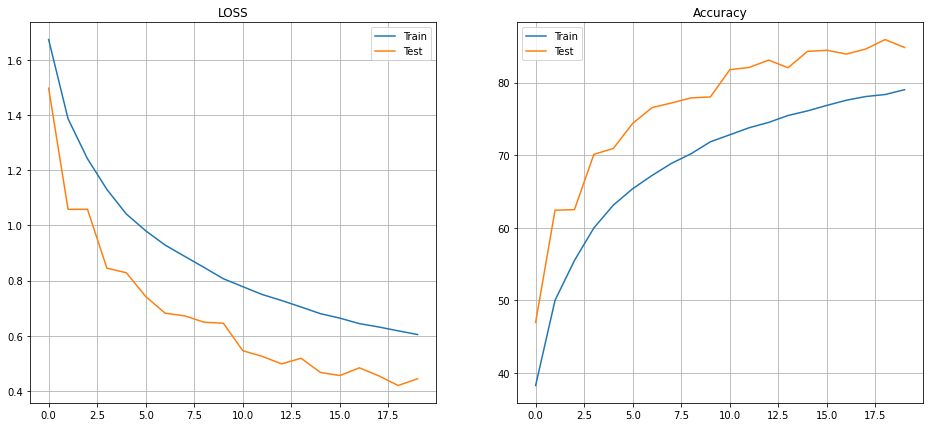

In [12]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(16,7))
axs[0].set_title('LOSS')
axs[0].plot(history[1], label='Train')
axs[0].plot(history[3], label='Test')
axs[0].legend()
axs[0].grid()

axs[1].set_title('Accuracy')
axs[1].plot(history[0], label='Train')
axs[1].plot(history[2], label='Test')
axs[1].legend()
axs[1].grid()

plt.show()

In [13]:
torch.save(net_18.state_dict(), "resnet18.pt")

In [90]:
import importlib
importlib.reload(utils)

<module 'utils' from '/content/eva8-pytorch-models/utils.py'>

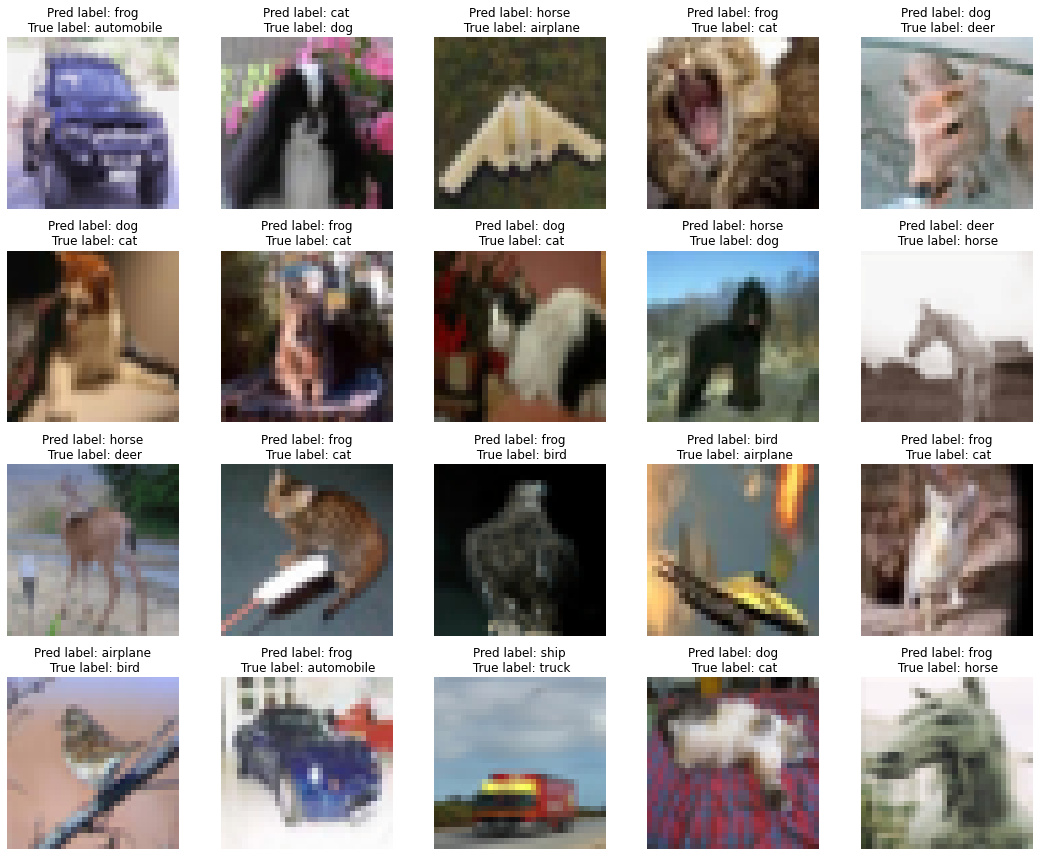

In [74]:
mean, std = np.array([0.49139968, 0.48215841, 0.44653091]), np.array([0.24703223, 0.24348513, 0.26158784])
misclf = utils.plot_misclassified(net_18, test_loader, testset.classes, device, mean, std, return_misclf=True)

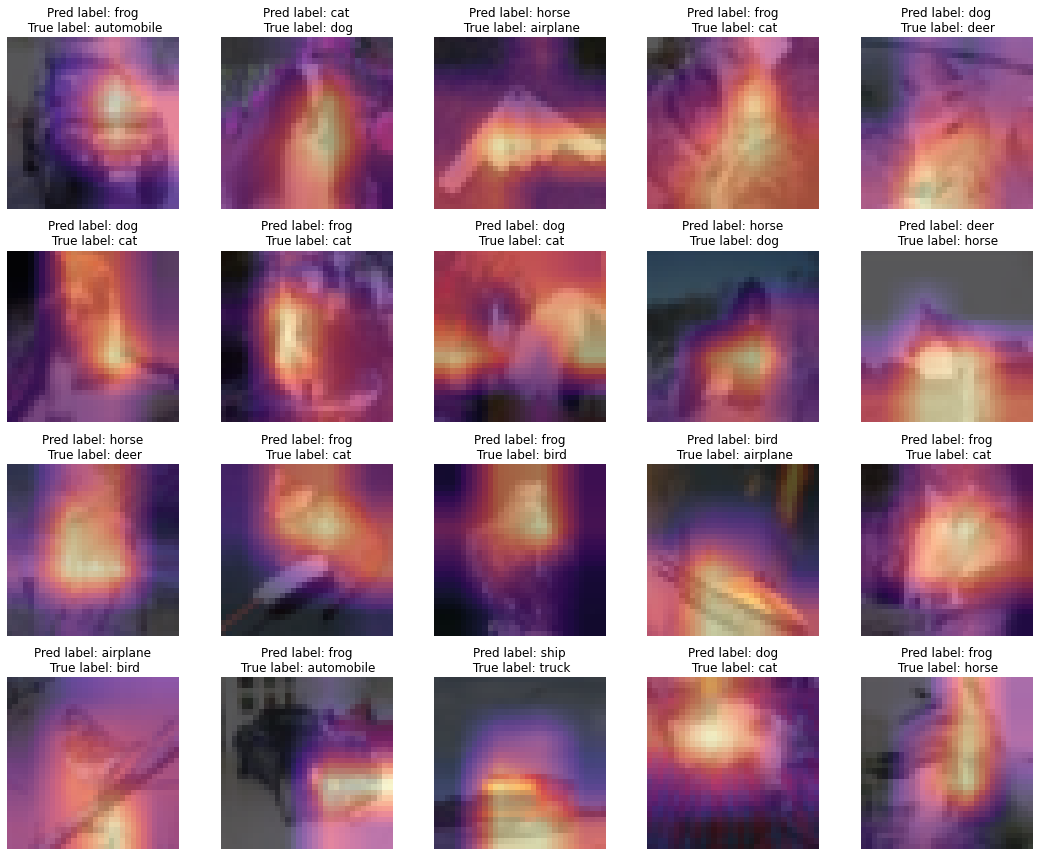

In [78]:
target_layers = [net_18.layer4[1]]
utils.gradcam_vis(net_18,target_layers, misclf, testset.classes,plot_size=(4,5))